In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
train_dataset, test_dataset = get_test_datasets('dry_bean', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('dry_bean', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('dry_bean')
num_tries = 15

dataset_shapes

([16], [7])

In [3]:
# Shape
def get_dims(x, i, o):
    return i - x * (i - o) / 4

for x in range(1,4):
    print(f'{get_dims(x, dataset_shapes[0][0], dataset_shapes[1][0]):.2f}')

13.75
11.50
9.25


### S(X,X,X)

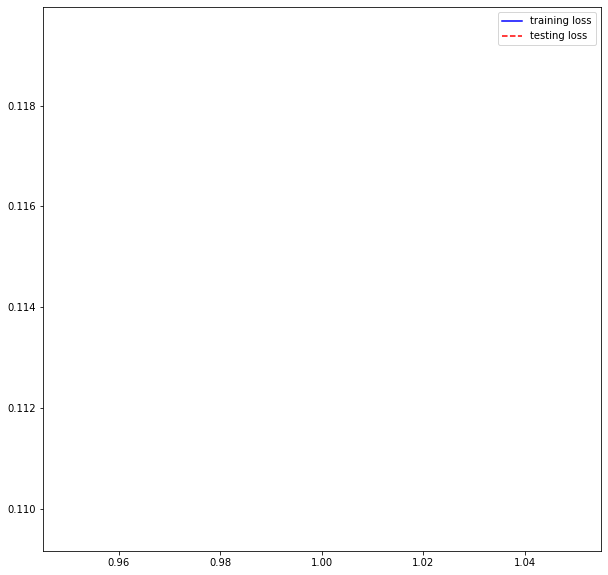

Elapsed training time: 2.37124 sec
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 14)                238       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                180       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 117       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 70        
Total params: 605
Trainable params: 605
Non-trainable params: 0
_________________________________________________________________


In [4]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[14,12,9], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(2)

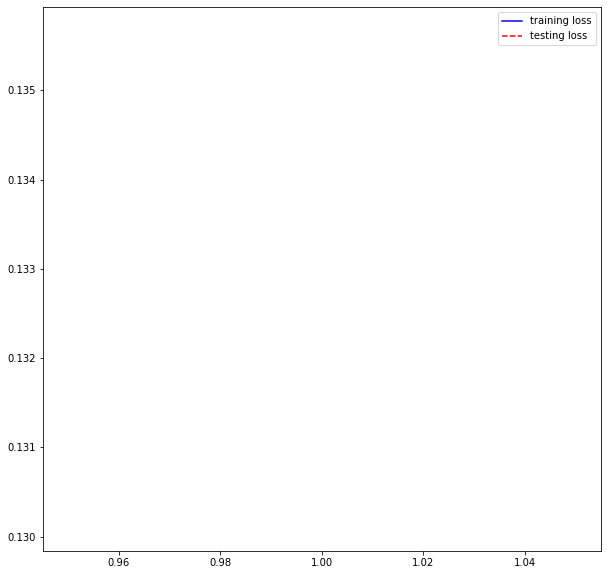

Elapsed training time: 1.60985 sec
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
v_input_6 (VInput)           (None, 17, 8)             136       
_________________________________________________________________
v_fractal_6 (VFractal)       (None, 9, 7)              503       
_________________________________________________________________
v_output_7 (VOutput)         (None, 7)                 0         
Total params: 639
Trainable params: 639
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(8,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(3)

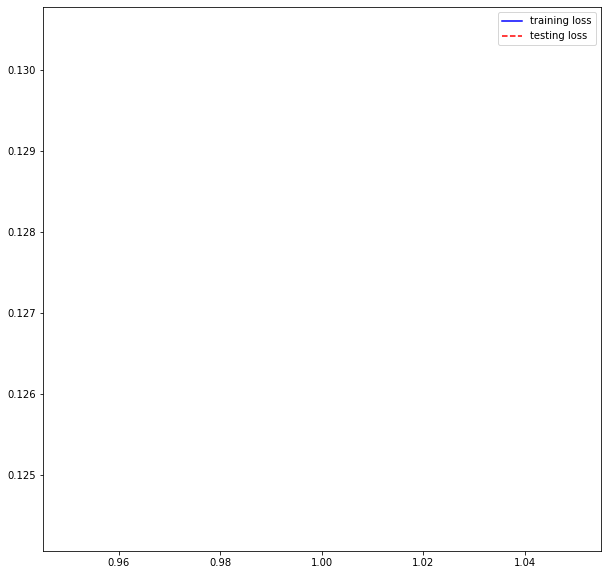

Elapsed training time: 1.62390 sec
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
v_input_12 (VInput)          (None, 17, 6)             102       
_________________________________________________________________
v_fractal_12 (VFractal)      (None, 7, 7)              523       
_________________________________________________________________
v_output_13 (VOutput)        (None, 7)                 0         
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(6,), inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(4)

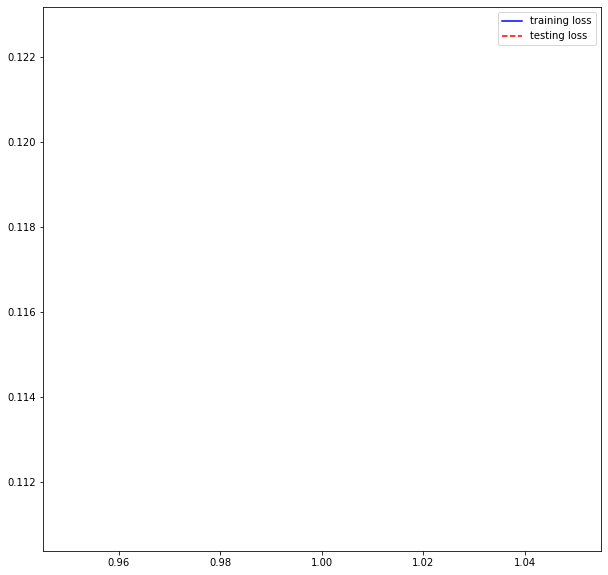

Elapsed training time: 1.70466 sec
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 16)]              0         
_________________________________________________________________
v_input_18 (VInput)          (None, 17, 5)             85        
_________________________________________________________________
v_fractal_18 (VFractal)      (None, 6, 7)              557       
_________________________________________________________________
v_output_19 (VOutput)        (None, 7)                 0         
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(5)

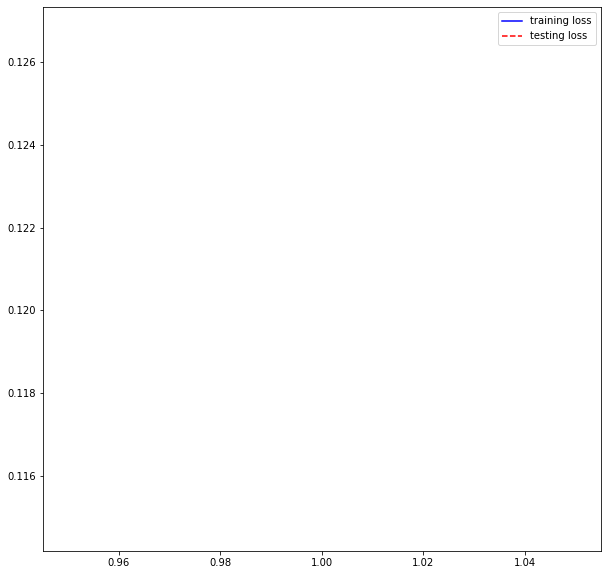

Elapsed training time: 1.74130 sec
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 16)]              0         
_________________________________________________________________
v_input_22 (VInput)          (None, 17, 4)             68        
_________________________________________________________________
v_fractal_22 (VFractal)      (None, 5, 7)              543       
_________________________________________________________________
v_output_23 (VOutput)        (None, 7)                 0         
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(4,), inner_hidden_layer_units=(5,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)